# Introduction to NLP Fundamentals in TensorFlow - Disaster Tweets Classification

NLP has the goal of deriving informaton out of natural language (could be seqeuences text or speech).

Another common term for NLP problems is sequence to sequence problems (seq2seq).

The main goal of natural language processing (NLP) is to derive information from natural language.

Natural language is a broad term but you can consider it to cover any of the following:

1. Text (such as that contained in an email, blog post, book, Tweet)
2. Speech (a conversation you have with a doctor, voice commands you give to a smart speaker)

Under the umbrellas of text and speech there are many different things you might want to do.

If you're building an email application, you might want to scan incoming emails to see if they're spam or not spam (classification).

If you're trying to analyse customer feedback complaints, you might want to discover which section of your business they're for.


**Note:** Both of these types of data are often referred to as sequences (a sentence is a sequence of words). So a common term you'll come across in NLP problems is called seq2seq, in other words, finding information in one sequence to produce another sequence (e.g. converting a speech command to a sequence of text-based steps).



### Hands on practice
To get hands-on with NLP in TensorFlow, we're going to practice the steps we've used previously but this time with text data:

````
Text -> turn into numbers -> build a model -> train the model to find patterns -> use patterns (make predictions)
````

## Topics Overview
What we're going to cover?

- Downloading a text dataset
- Visualizing text data
- Converting text into numbers using tokenization
- Turning our tokenized text into an embedding
- Modelling a text dataset
  - Starting with a baseline (TF-IDF)
  - Building several deep learning text models
    - Dense, LSTM, GRU, Conv1D, Transfer learning
- Comparing the performance of each our models
- Combining our models into an ensemble
- Saving and loading a trained model
- Find the most wrong predictions


## Import Datetime

In [1]:
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2023-06-19 00:23:30.701270


## Check for GPU

In [2]:
!nvidia-smi

Mon Jun 19 00:23:32 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-4f5ac4bb-60f1-f1d2-1c6a-63421d21ce3b)


## Get Helper Functions

In [4]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import series of helper functions for the notebook
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

--2023-06-19 00:23:32--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-06-19 00:23:32 (83.4 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



## Get a Text Dataset

The dataset we're going to be using is Kaggle's introduction to NLP dataset (text samples of Tweets labelled as diaster or not diaster).

See the original source here: https://www.kaggle.com/c/nlp-getting-started


In [5]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

# Unzip data
unzip_data("nlp_getting_started.zip")

--2023-06-19 00:23:36--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 64.233.170.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip.1’

nlp_getting_started 100%[===================>] 593.11K   733KB/s    in 0.8s    

2023-06-19 00:23:37 (733 KB/s) - ‘nlp_getting_started.zip.1’ saved [607343/607343]



## Dataset Description

### What should I expect the data format to be?

Each sample in the train and test set has the following information:

- The text of a tweet
- A keyword from that tweet (although this may be blank!)
- The location the tweet was sent from (may also be blank)

### What am I predicting?

You are predicting whether a given tweet is about a real disaster or not. If so, predict a 1. If not, predict a 0.
Files

- `train.csv` - the training set
- `test.csv` - the test set
- `sample_submission.csv` - a sample submission file in the correct format

### Columns

- `id` - a unique identifier for each tweet
- `text` - the text of the tweet
- `location` - the location the tweet was sent from (may be blank)
- `keyword` - a particular keyword from the tweet (may be blank)
- `target` - in train.csv only, this denotes whether a tweet is about a real disaster `(1)` or not `(0)`



## Visualizing a Text Dataset



In [6]:
# Load the dataset
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
# Example of a text dataset
test_df["text"][0]

'Just happened a terrible car crash'

In [8]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


Notice how the training data has a `"target"` column.

We're going to be writing code to find patterns (e.g. different combinations of words) in the `"text"` column of the training dataset to predict the value of the `"target"` column.

The test dataset doesn't have a `"target"` column.
````
Inputs (text column) -> Machine Learning Algorithm -> Outputs (target column)
````

### View Test Dataset
Test datatset doesn't have the target column.

In [9]:
# What does the test dataframe look like?
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [10]:
# How many examples of each class?
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [11]:
# How many total samples?
len(train_df), len(test_df)

(7613, 3263)

In [12]:
# Let's visualize some random training examples
import random
random_index = random.randint(0, len(train_df)-5) # create random indexes not higher than the total number of samples
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target =  row # the underscore will get rid of the index
  print(f"Target: {target}", "(real diaster)" if target > 0 else "(not real diaster)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 1 (real diaster)
Text:
Rocky Fire http://t.co/wxhMp5ppjq

---

Target: 1 (real diaster)
Text:
Fukushima Nuclear Disaster | Increased Thyroid Cancer in U.S. http://t.co/FtuNlH6ddg

---

Target: 1 (real diaster)
Text:
Nearly 50 thousand people affected by floods in #Paraguay ? http://t.co/aw23wXtyjB http://t.co/ABgct9VFUa

---

Target: 0 (not real diaster)
Text:
Don't let your style fall flat this summer! Lord &amp; Cliff #thinkpink #magichairbump is your answer. Adding this... http://t.co/NmHZTB1ewM

---

Target: 0 (not real diaster)
Text:
Photo: Beach Earrings Beach Jewelry Vacation Earrings Keep Calm and Beach On Earrings Made with Flattened... http://t.co/rjEbpiB5rZ

---



## Split Data into Training and Validation Sets

We want to be able to see how our model is performing on unseen data whilst it trains.

And because the testing dataset doesn't have labels, we'll have to create a validation dataset to evaluate on (the model won't see the validation dataset during training so we can use its samples and labels to evaluate our model's performance).


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# Use train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1, # use 10% of training data for validation split
                                                                            random_state=42)

In [15]:
# Check the lengths
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)


(6851, 6851, 762, 762)

In [16]:
# Check the first 10 samples
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,


## Converting text into numbers

When dealing with a text problem, one of the first things you'll have to do before you can build a model is to convert your text to numbers.

There are a few ways to do this, namely:

- `Tokenziation` - direct mapping of token (a token could be a word or a character) to number
- `Embedding` - create a matrix of feature vector for each token (the size of the feature vector can be defined and this embedding can be learned)




### Tokenization
**Tokenization** - A straight mapping from word or character or sub-word to a numerical value. There are three main levels of tokenization:

1. Using **word-level tokenization** with the sentence "I love TensorFlow" might result in "I" being `0`, "love" being `1` and "TensorFlow" being `2`. In this case, every word in a sequence considered a single **token**.
2. **Character-level tokenization**, such as converting the letters `A-Z` to values `1-26`. In this case, every character in a sequence considered a single **token**.
3. **Sub-word tokenization** is in between word-level and character-level tokenization. It involves breaking invidual words into smaller parts and then converting those smaller parts into numbers. For example, "my favourite food is pineapple pizza" might become "my, fav, avour, rite, fo, oo, od, is, pin, ine, app, le, piz, za". After doing this, these sub-words would then be mapped to a numerical value. In this case, every word could be considered multiple **tokens**.

### Embeddings
**Embeddings** - An embedding is a representation of natural language which can be learned. Representation comes in the form of a **feature vector**. For example, the word "dance" could be represented by the 5-dimensional vector `[-0.8547, 0.4559, -0.3332, 0.9877, 0.1112]`. It's important to note here, the size of the feature vector is tuneable. There are two ways to use embeddings:

- **Create your own embedding** - Once your text has been turned into numbers (required for an embedding), you can put them through an embedding layer (such as `tf.keras.layers.Embedding`) and an embedding representation will be learned during model training.
- **Reuse a pre-learned embedding** - Many pre-trained embeddings exist online. These pre-trained embeddings have often been learned on large corpuses of text (such as all of Wikipedia) and thus have a good underlying representation of natural language. You can use a pre-trained embedding to initialize your model and fine-tune it to your own specific task.

## Tokenization (Text Vectorization) Process

To tokenize our words, we'll use the helpful preprocessing layer [tf.keras.layers.experimental.preprocessing.TextVectorization](https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization).

The `TextVectorization` layer takes the following parameters:

- `max_tokens` - The maximum number of words in your vocabulary (e.g. 20000 or the number of unique words in your text), includes a value for OOV (out of vocabulary) tokens.
- `standardize` - Method for standardizing text. Default is `"lower_and_strip_punctuation"` which lowers text and removes all punctuation marks.
- `split` - How to split text, default is `"whitespace"` which splits on spaces.
- `ngrams` - How many words to contain per token split, for example, ngrams=2 splits tokens into continuous sequences of 2.
- `output_mode` - How to output tokens, can be `"int"` (integer mapping), `"binary"` (one-hot encoding), `"count"` or `"tf-idf"`. See documentation for more.
- `output_sequence_length` - Length of tokenized sequence to output. For example, if `output_sequence_length=150`, all tokenized sequences will be 150 tokens long.
- `pad_to_max_tokens` - Defaults to `False`, if `True`, the output feature axis will be padded to `max_tokens` even if the number of unique tokens in the vocabulary is less than `max_tokens`. Only valid in certain modes, see docs for more.



In [17]:
train_sentences[:5]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
      dtype=object)

In [18]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization # after TensorFlow 2.6

# Use the default TextVectorization variables
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (all of the different words in your text)
                                    standardize="lower_and_strip_punctuation", # how to process text
                                    split="whitespace", # how to split tokens
                                    ngrams=None, # create groups of n-words?
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=None) # how long should the output sequence of tokens be?
                                    # pad_to_max_tokens=True) # Not valid if using max_tokens=None


In [19]:
len(train_sentences[0].split())

7

In [20]:
# Find the average number of tokens (words) in the training tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [21]:
# Setup text vectorization variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (e.g. how many words from a Tweet does a model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [22]:
# Fit the text vectorizer instance to the training data using the adapt() method
text_vectorizer.adapt(train_sentences)

In [23]:
# Create a sample sentence and tokenize it
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [24]:
# Choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
        \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
We The Free Hailstorm Maxi http://t.co/ERWs6IELdG        

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 46,   2, 268, 818,   1,   1,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [25]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # the most common words in the vocab
bottom_5_words = words_in_vocab[-5:] # the least common words in the vocab
print(f"Most common words in vocab: {top_5_words}")
print(f"Least common words in vocab: {bottom_5_words}")

Most common words in vocab: ['', '[UNK]', 'the', 'a', 'in']
Least common words in vocab: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


In [26]:
# how long is our vocab?
len(words_in_vocab)

10000

## Embedding Process
We've got a way to map our text to numbers. How about we go a step further and turn those numbers into an embedding?

The powerful thing about an embedding is it can be learned during training. This means rather than just being static (e.g. `1` = I, `2` = love, `3` = TensorFlow), a word's numeric representation can be improved as a model goes through data samples.

We can see what an embedding of a word looks like by using the [tf.keras.layers.Embedding layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding).

The main parameters we're concerned about here are:

- `input_dim` - The size of the vocabulary (e.g. `len(text_vectorizer.get_vocabulary()`).
- `output_dim` - The size of the output embedding vector, for example, a value of 100 outputs a feature vector of size `100` for each word.
- `embeddings_initializer` - How to initialize the embeddings matrix, default is `"uniform"` which randomly initalizes embedding matrix with uniform distribution. This can be changed for using pre-learned embeddings.
- `input_length` - Length of sequences being passed to embedding layer.

Knowing these, let's make an embedding layer.



In [27]:
max_length

15

In [28]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set the input shape
                             output_dim=128, # set the size of the embedding vector
                             embeddings_initializer="uniform", # default, initialize embedding vectors randomly
                             input_length=max_length # how long is each input
                             )

embedding

In [29]:
# Get a random sentence from training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
        \n\nEmbedded version:")

# Embed the random sentence (turn it into numerical representation, aka tokenization first)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
M1.57 [01:11 UTC]?3km NNW of Lake Henshaw California. http://t.co/f9KQksoSw3        

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.01831982, -0.0234395 ,  0.00667703, ..., -0.00727345,
          0.03127391, -0.03901551],
        [-0.01831982, -0.0234395 ,  0.00667703, ..., -0.00727345,
          0.03127391, -0.03901551],
        [ 0.03490067, -0.01525396,  0.02425655, ...,  0.01478534,
          0.03958039,  0.00457487],
        ...,
        [ 0.03394183,  0.04983724,  0.01039345, ...,  0.02657772,
         -0.02181619, -0.03911749],
        [ 0.03394183,  0.04983724,  0.01039345, ...,  0.02657772,
         -0.02181619, -0.03911749],
        [ 0.03394183,  0.04983724,  0.01039345, ...,  0.02657772,
         -0.02181619, -0.03911749]]], dtype=float32)>

In [30]:
sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([-0.01831982, -0.0234395 ,  0.00667703,  0.04089118, -0.04768474,
       -0.01377981,  0.00516091,  0.04741095, -0.0327791 , -0.02121046,
       -0.02027029,  0.04345081,  0.02319108, -0.04057284, -0.00973419,
        0.00302285, -0.04903164,  0.01824603, -0.01876665,  0.0013242 ,
       -0.04240083, -0.03977325,  0.01330883,  0.04736532,  0.01138728,
       -0.00933375, -0.02379005, -0.02676315,  0.03231755,  0.04851048,
        0.03622878,  0.04173255,  0.0345596 ,  0.00514239,  0.0005451 ,
       -0.03027297,  0.03785887,  0.03444971,  0.01883746, -0.04057992,
       -0.03608246, -0.03398831,  0.04401362,  0.02014253, -0.02444744,
        0.01128281, -0.03744247, -0.00209308, -0.01577343,  0.04522472,
       -0.03404094,  0.03279561, -0.02321025,  0.01906279, -0.01498985,
       -0.03155984, -0.04689842, -0.04733318, -0.04573957, -0.00035579,
       -0.03919668,  0.01106616, -0.04301094,  0.01854496,  0.00620496,
       -0.018462

## Modeling Text Dataset
Now that we've got a way to turn our text data into numbers, we can start to build machine learning models to model it.

More specifically, we'll be building the following:

Choosing the right estimator:  https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
- `Model 0`: Naive Bayes (baseline)
- `Model 1`: Feed-forward neural network (dense model)
- `Model 2`: LSTM model
- `Model 3`: GRU model
- `Model 4`: Bidirectional-LSTM model
- `Model 5`: 1D Convolutional Neural Network
- `Model 6`: TensorFlow Hub Pretrained Feature Extractor
- `Model 7`: Same as model 6 with 10% of training data

Model 0 is the simplest to acquire a baseline which we'll expect each other of the other deeper models to beat.



### Modeling Steps
Each experiment will go through the following steps:

1. Construct the model
2. Train the model
3. Make predictions with the model
4. Track prediction evaluation metrics for later comparison


## Creating Evaluation Functions

Let's make a function to evaluate our modelling experiment predictions using:

- Accuracy
- Precision
- Recall
- F1-score

Note: Since we're dealing with a classification problem, the above metrics are the most appropriate. If we were working with a regression problem, other metrics such as MAE (mean absolute error) would be a better choice.

From [Scikit-learn's model evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html)

In [31]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"Accuracy": model_accuracy,
                  "Precision": model_precision,
                  "Recall": model_recall,
                  "F1": model_f1}
  return model_results


## Model 0: Baseline Model- Naive Bayes

As with all machine learning modelling experiments, it's important to create a baseline model so you've got a benchmark for future experiments to build upon.

To create our baseline, we'll create a Scikit-Learn Pipeline using the `TF-IDF` (term frequency-inverse document frequency) formula to convert our words to numbers and then model them with the [Multinomial Naive Bayes algorithm](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB). This was chosen via referring to the [Scikit-Learn machine learning map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html).

In [32]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf - https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
                    ("clf", MultinomialNB()) # model the text converted to numbers
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

CPU times: user 238 ms, sys: 8.7 ms, total: 247 ms
Wall time: 272 ms


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [33]:
# Let's evalaute our baseline model
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 79.27%


In [34]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:10]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0])

In [35]:
# Get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'Accuracy': 79.26509186351706,
 'Precision': 0.8111390004213173,
 'Recall': 0.7926509186351706,
 'F1': 0.7862189758049549}

## Model 1: A Simple Dense Model- Feed-forward Neural Network

The first "deep" model we're going to build is a single layer dense model. In fact, it's barely going to have a single layer.

It'll take our text and labels as input, tokenize the text, create an embedding, find the average of the embedding (using Global Average Pooling) and then pass the average through a fully connected layer with one output unit and a sigmoid activation function.

If the previous sentence sounds like a mouthful, it'll make sense when we code it out (remember, if in doubt, code it out).

And since we're going to be building a number of TensorFlow deep learning models, we'll import our `create_tensorboard_callback()` function from `helper_functions.py` to keep track of the results of each.

In [36]:
# Create tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [37]:
train_sentences[:5]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
      dtype=object)

In [38]:
# Build model with the Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string") # inputs are 1-dimensional strings
x = text_vectorizer(inputs) # turn the input text into numbers
x = embedding(x) # create an embedding of the numerized numbers
x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding (try running the model without this layer and see what happens)
outputs = layers.Dense(1, activation="sigmoid")(x) # create the output layer, want binary outputs so use sigmoid activation
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense") # construct the model

Our model takes a 1-dimensional string as input (in our case, a Tweet), it then tokenizes the string using `text_vectorizer` and creates an embedding using `embedding`.
Before we can fit our model to the data, we've got to compile it. Since we're working with binary classification, we'll use `"binary_crossentropy"` as our loss function and the Adam optimizer.

In [39]:
# Compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_sentences,
                        train_labels,
                        epochs=5,
                        validation_data=(val_sentences, val_labels),
                        callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                               experiment_name="model_1_dense")])


Saving TensorBoard log files to: model_logs/model_1_dense/20230619-002342
Epoch 1/5
215/215 [==============================] - 30s 123ms/step - loss: 0.6106 - accuracy: 0.6917 - val_loss: 0.5329 - val_accuracy: 0.7612
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.4406 - accuracy: 0.8190 - val_loss: 0.4724 - val_accuracy: 0.7874
Epoch 3/5
215/215 [==============================] - 4s 17ms/step - loss: 0.3461 - accuracy: 0.8624 - val_loss: 0.4629 - val_accuracy: 0.7913
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.2839 - accuracy: 0.8894 - val_loss: 0.4705 - val_accuracy: 0.7913
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.2372 - accuracy: 0.9142 - val_loss: 0.4796 - val_accuracy: 0.7822


In [40]:
# Evaluate model 1
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4796 - accuracy: 0.7822


[0.4795783460140228, 0.7821522355079651]

In [41]:
# Make predictions with model_1
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[:10]

24/24 [==============================] - 0s 2ms/step


array([[0.35427338],
       [0.77249527],
       [0.9980326 ],
       [0.12146935],
       [0.11410256],
       [0.94627726],
       [0.9101854 ],
       [0.99243224],
       [0.96260744],
       [0.24853073]], dtype=float32)

In [42]:
# Convert model_1 pred probs from probabilities to prediction labels
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [43]:
val_labels[:10]

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [44]:
# Evaluate model_1 with our evaluation function
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)
model_1_results

{'Accuracy': 78.21522309711287,
 'Precision': 0.7860403042839984,
 'Recall': 0.7821522309711286,
 'F1': 0.779380517102918}

In [45]:
baseline_results

{'Accuracy': 79.26509186351706,
 'Precision': 0.8111390004213173,
 'Recall': 0.7926509186351706,
 'F1': 0.7862189758049549}

In [46]:
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

In [47]:
# Create a helper function to compare our baseline results to new model results
def compare_baseline_to_new_results(baseline_results, new_model_results):
  for key, value in baseline_results.items():
    print(f"Baseline {key}: {value:.2f}, New {key}: {new_model_results[key]:.2f}, Difference: {new_model_results[key]-value:.2f}")

compare_baseline_to_new_results(baseline_results=baseline_results,
                                new_model_results=model_1_results)


Baseline Accuracy: 79.27, New Accuracy: 78.22, Difference: -1.05
Baseline Precision: 0.81, New Precision: 0.79, Difference: -0.03
Baseline Recall: 0.79, New Recall: 0.78, Difference: -0.01
Baseline F1: 0.79, New F1: 0.78, Difference: -0.01



### Visualizing Learned Embeddings

To further understand word embeddings, let's visualize them, to do so, we'll get the weights matrix (embedding matrix) from our embedding layer and visualize it using the Embedding project tool, see the TensorFlow guide for more: https://www.tensorflow.org/tutorials/text/word_embeddings


In [48]:
# Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [49]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [50]:
# Get the weight matrix of embedding layer
# (the weights are the numerical patterns between the text in the training dataset that the model has learned)
embed_weights = model_1.get_layer("embedding").get_weights()[0]
print(embed_weights.shape)


(10000, 128)




Now we've got these two objects, we can use the **Embedding Projector** tool to visualize our embedding.

To use the Embedding Projector tool, we need two files:

- The embedding vectors (same as embedding weights).
- The meta data of the embedding vectors (the words they represent - our vocabulary).

Right now, we've got of these files as Python objects. To download them to file, we're going to [use the code example available on the TensorFlow word embeddings tutorial page](https://www.tensorflow.org/text/guide/word_embeddings#retrieve_the_trained_word_embeddings_and_save_them_to_disk).


In [51]:
# Code below is adapted from: https://www.tensorflow.org/tutorials/text/word_embeddings#retrieve_the_trained_word_embeddings_and_save_them_to_disk
import io

# Create output writers
out_v = io.open("embedding_vectors.tsv", "w", encoding="utf-8")
out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8")

# Write embedding vectors and words to file
for num, word in enumerate(words_in_vocab):
   if num == 0:
     continue # skip padding token
   vec = embed_weights[num]
   out_m.write(word + "\n") # write words to file
   out_v.write("\t".join([str(x) for x in vec]) + "\n") # write corresponding word vector to file
out_v.close()
out_m.close()

In [52]:
# Let's download the saved embeddings locally
try:
  from google.colab import files
  files.download('embedding_vectors.tsv')
  files.download('embedding_metadata.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Once you've downloaded the embedding vectors and metadata, you can visualize them using Embedding Vector tool:

1. Go to http://projector.tensorflow.org/
2. Click on "Load data"
3. Upload the two files you downloaded (embedding_vectors.tsv and embedding_metadata.tsv)
4. Explore
5. Optional: You can share the data you've created by clicking "Publish"


**Are words with similar meanings close together?**

Remember, they might not be. The embeddings we downloaded are how our model interprets words, not necessarily how we interpret them.

Also, since the embedding has been learned purely from Tweets, it may contain some strange values as Tweets are a very unique style of natural language.



Our visual word embeddings might not look like much to us, but they help our model understand the relationships between words.

For more on a popular type of word embedding and more visual explanations check out the illustrated word2vec: https://jalammar.github.io/illustrated-word2vec/


## Recurrent Neural Network (RNNs)
For our next series of modelling experiments we're going to be using a special kind of neural network called a **Recurrent Neural Network (RNN)**.

The premise of an RNN is simple: use information from the past to help you with the future (this is where the term recurrent comes from). In other words, take an input `(X)` and compute an output `(y)` based on all previous inputs.

This concept is especially helpful when dealing with sequences such as passages of natural language text (such as our Tweets).

For example, when you read this sentence, you take into context the previous words when deciphering the meaning of the current word dog.

See what happened there?

I put the word "dog" at the end which is a valid word but it doesn't make sense in the context of the rest of the sentence.

When an RNN looks at a sequence of text (already in numerical form), the patterns it learns are continually updated based on the order of the sequence.

For a simple example, take two sentences:

- Massive earthquake last week, no?
- No massive earthquake last week.

Both contain exactly the same words but have different meaning. The order of the words determines the meaning (one could argue punctuation marks also dictate the meaning but for simplicity sake, let's stay focused on the words).

Recurrent neural networks can be used for a number of sequence-based problems:

- **One to one:** one input, one output, such as image classification.
- **One to many:** one input, many outputs, such as image captioning (image input, a sequence of text as caption output).
- **Many to one:** many inputs, one outputs, such as text classification (classifying a Tweet as real diaster or not real diaster).
- **Many to many:** many inputs, many outputs, such as machine translation (translating English to Spanish) or speech to text (audio wave as input, text as output).

When you come across RNN's in the wild, you'll most likely come across variants of the following:

1. Long short-term memory cells (LSTMs).
2. Gated recurrent units (GRUs).
3. Bidirectional RNN's (passes forward and backward along a sequence, left to right and right to left).

Going into the details of each these is beyond the scope of this notebook (we're going to focus on using them instead), the main thing you should know for now is that they've proven very effective at modelling sequences.

## Model 2: LSTM
We're going to start with an LSTM-powered RNN.

To harness the power of the LSTM cell (LSTM cell and LSTM layer are often used interchangably) in TensorFlow, we'll use `tensorflow.keras.layers.LSTM()`.

Coloured block example of the structure of an recurrent neural network.

Our model is going to take on a very similar structure to `model_1`:



```
Input (text) -> Tokenize -> Embedding -> Layers -> Output (label probability)
```



The main difference will be that we're going to add an LSTM layer between our embedding and output.

And to make sure we're not getting reusing trained embeddings (this would involve data leakage between models, leading to an uneven comparison later on), we'll create another embedding layer `(model_2_embedding)` for our model. The `text_vectorizer` layer can be reused since it doesn't get updated during training.

**Note:** The reason we use a new embedding layer for each model is since the embedding layer is a learned representation of words (as numbers), if we were to use the same embedding layer (embedding_1) for each model, we'd be mixing what one model learned with the next. And because we want to compare our models later on, starting them with their own embedding layer each time is a better idea.

In [121]:
# Create LSTM model
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
print(f"After embedding: {x.shape}")
x = layers.LSTM(64, activation="tanh", return_sequences=True)(x) # use return_sequences=True if you want to stack recurrent layers
print(f"After LSTM cell with return_sequences=True: {x.shape}")
x = layers.LSTM(64, activation="tanh")(x)
print(f"After LSTM cell: {x.shape}")
x = layers.Dense(64, activation="relu")(x) # optional dense layer to have on top of LSTM layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")


After embedding: (None, 15, 128)
After LSTM cell with return_sequences=True: (None, 15, 64)
After LSTM cell: (None, 64)


In [54]:
# Compile model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit model
history_2 = model_2.fit(train_sentences,
                        train_labels,
                        epochs=5,
                        validation_data=(val_sentences, val_labels),
                        callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                               experiment_name="model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20230619-002426
Epoch 1/5
215/215 [==============================] - 20s 65ms/step - loss: 0.2220 - accuracy: 0.9242 - val_loss: 0.5657 - val_accuracy: 0.7874
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 0.1585 - accuracy: 0.9431 - val_loss: 0.6817 - val_accuracy: 0.7861
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.1291 - accuracy: 0.9531 - val_loss: 0.6484 - val_accuracy: 0.7769
Epoch 4/5
215/215 [==============================] - 3s 16ms/step - loss: 0.1074 - accuracy: 0.9606 - val_loss: 0.9894 - val_accuracy: 0.7717
Epoch 5/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0816 - accuracy: 0.9661 - val_loss: 1.0309 - val_accuracy: 0.7651


In [55]:
# Make predictions on the validation dataset
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs.shape, model_2_pred_probs[:10]

24/24 [==============================] - 1s 8ms/step


((762, 1),
 array([[5.0018099e-03],
        [7.6649261e-01],
        [9.9976808e-01],
        [2.1147523e-03],
        [9.3995914e-05],
        [9.9310148e-01],
        [8.8223064e-01],
        [9.9972183e-01],
        [9.9959129e-01],
        [2.8386170e-01]], dtype=float32))

In [56]:
# Round out pred probs and reduce to 1-dimensional array
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [57]:
# Calculate our LSTM model's results
model_2_preds = tf.squeeze(tf.round(model_2_preds))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [58]:
# Calculate our model 2 results
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

{'Accuracy': 76.50918635170603,
 'Precision': 0.7719065791622673,
 'Recall': 0.7650918635170604,
 'F1': 0.7606619108573679}

In [59]:
# Check to see how the bidirectional model performs against the baseline
compare_baseline_to_new_results(baseline_results, model_2_results)

Baseline Accuracy: 79.27, New Accuracy: 76.51, Difference: -2.76
Baseline Precision: 0.81, New Precision: 0.77, Difference: -0.04
Baseline Recall: 0.79, New Recall: 0.77, Difference: -0.03
Baseline F1: 0.79, New F1: 0.76, Difference: -0.03


In [60]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 15, 64)            49408     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                      


## Model 3: GRU

Another popular and effective RNN component is the GRU or gated recurrent unit.

The GRU cell has similar features to an LSTM cell but has less parameters.


To use the GRU cell in TensorFlow, we can call the `tensorflow.keras.layers.GRU()` class.

The architecture of the GRU-powered model will follow the same structure we've been using:
````
Input (text) -> Tokenize -> Embedding -> Layers -> Output (label probability)
````
Again, the only difference will be the layer(s) we use between the embedding and the output.


In [61]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_3_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_3")

# Build an RNN using the GRU cell
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_3_embedding(x)
# x = layers.GRU(64, return_sequences=True) # stacking recurrent cells requires return_sequences=True
x = layers.GRU(64)(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer after GRU cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [62]:
# Compile model_3 (GRU)
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="model_3_GRU")])


Saving TensorBoard log files to: model_logs/model_3_GRU/20230619-002514
Epoch 1/5
215/215 [==============================] - 15s 54ms/step - loss: 0.5239 - accuracy: 0.7316 - val_loss: 0.4582 - val_accuracy: 0.7730
Epoch 2/5
215/215 [==============================] - 4s 18ms/step - loss: 0.3203 - accuracy: 0.8694 - val_loss: 0.4940 - val_accuracy: 0.7822
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.2196 - accuracy: 0.9159 - val_loss: 0.5630 - val_accuracy: 0.7677
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1581 - accuracy: 0.9438 - val_loss: 0.6265 - val_accuracy: 0.7808
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.1184 - accuracy: 0.9591 - val_loss: 0.6109 - val_accuracy: 0.7690


In [63]:
# Make predictions with the trained model
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10], model_3_pred_probs.shape

24/24 [==============================] - 0s 3ms/step


(array([[0.32993314],
        [0.8788255 ],
        [0.99605715],
        [0.14864157],
        [0.01211532],
        [0.9900227 ],
        [0.7597425 ],
        [0.99589974],
        [0.99576   ],
        [0.604329  ]], dtype=float32),
 (762, 1))

In [64]:
# Convert model 3 pred probs into labels
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [65]:
# Calculate results for model 3
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)
model_3_results

{'Accuracy': 76.9028871391076,
 'Precision': 0.768831787959534,
 'Recall': 0.7690288713910761,
 'F1': 0.7681575014390807}

In [66]:
# Check to see how the bidirectional model performs against the baseline
compare_baseline_to_new_results(baseline_results, model_3_results)


Baseline Accuracy: 79.27, New Accuracy: 76.90, Difference: -2.36
Baseline Precision: 0.81, New Precision: 0.77, Difference: -0.04
Baseline Recall: 0.79, New Recall: 0.77, Difference: -0.02
Baseline F1: 0.79, New F1: 0.77, Difference: -0.02


In [67]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

## Model 4: Bidirectional RNN Model
A standard RNN will process a sequence from left to right, where as a bidirectional RNN will process the sequence from left to right and then again from right to left.

Intuitively, this can be thought of as if you were reading a sentence for the first time in the normal fashion (left to right) but for some reason it didn't make sense so you traverse back through the words and go back over them again (right to left).

In practice, many sequence models often see and improvement in performance when using bidirectional RNN's.

However, this improvement in performance often comes at the cost of longer training times and increased model parameters (since the model goes left to right and right to left, the number of trainable parameters doubles).

Once again, TensorFlow helps us out by providing the `tensorflow.keras.layers.Bidirectional` class. We can use the Bidirectional class to wrap our existing RNNs, instantly making them bidirectional.

In [68]:
# Build a bidirectional RNN in TensorFlow
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
# x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x) # return_sequences=True required for stacking RNN layers
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_bidirectional")

In [69]:
# Compile model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit model
history_model_4 = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="model_4_bidirectional")])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20230619-002541
Epoch 1/5
215/215 [==============================] - 17s 57ms/step - loss: 0.1353 - accuracy: 0.9580 - val_loss: 0.8207 - val_accuracy: 0.7808
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0775 - accuracy: 0.9699 - val_loss: 0.9832 - val_accuracy: 0.7874
Epoch 3/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0582 - accuracy: 0.9742 - val_loss: 1.3642 - val_accuracy: 0.7756
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0538 - accuracy: 0.9761 - val_loss: 1.2130 - val_accuracy: 0.7717
Epoch 5/5
215/215 [==============================] - 4s 17ms/step - loss: 0.0471 - accuracy: 0.9771 - val_loss: 1.3280 - val_accuracy: 0.7769


In [70]:
# Make predictions with our bidirectional model
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10], model_4_pred_probs.shape

24/24 [==============================] - 1s 4ms/step


(array([[4.5001175e-02],
        [7.0826983e-01],
        [9.9996424e-01],
        [1.0227143e-01],
        [5.3240524e-06],
        [9.9991810e-01],
        [9.9762744e-01],
        [9.9998271e-01],
        [9.9995887e-01],
        [7.2469133e-01]], dtype=float32),
 (762, 1))

In [71]:
# Make predictions with our bidirectional model
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10], model_4_pred_probs.shape

24/24 [==============================] - 0s 4ms/step


(array([[4.5001175e-02],
        [7.0826983e-01],
        [9.9996424e-01],
        [1.0227143e-01],
        [5.3240524e-06],
        [9.9991810e-01],
        [9.9762744e-01],
        [9.9998271e-01],
        [9.9995887e-01],
        [7.2469133e-01]], dtype=float32),
 (762, 1))

In [72]:
# Convert pred probs to labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [73]:
# Calculate model 4 results
model_4_results = calculate_results(y_true=val_labels,
                                    y_pred=model_4_preds)
model_4_results

{'Accuracy': 77.69028871391076,
 'Precision': 0.7773989686400665,
 'Recall': 0.7769028871391076,
 'F1': 0.7755736342533732}

In [74]:
# Check to see how the bidirectional model performs against the baseline
compare_baseline_to_new_results(baseline_results, model_4_results)

Baseline Accuracy: 79.27, New Accuracy: 77.69, Difference: -1.57
Baseline Precision: 0.81, New Precision: 0.78, Difference: -0.03
Baseline Recall: 0.79, New Recall: 0.78, Difference: -0.02
Baseline F1: 0.79, New F1: 0.78, Difference: -0.01


In [75]:
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,3

## Convolutional Neural Networks for Text

The main difference between using CNNs for images and sequences is the shape of the data. Images come in `2-dimensions (height x width)` where as sequences are often `1-dimensional (a string of text)`.

So to use CNNs with sequences, we use a 1-dimensional convolution instead of a 2-dimensional convolution.

A typical CNN architecture for sequences will look like the following:
````
Inputs (text) -> Tokenization -> Embedding -> Layers -> Outputs (class probabilities)
````
This is similar to image classfier model.

The difference again is in the layers component. Instead of using an LSTM or GRU cell, we're going to use a `tensorflow.keras.layers.Conv1D()` layer followed by a `tensorflow.keras.layers.GlobablMaxPool1D()` layer.

**Resource:** The intuition here is explained succinctly in the paper [Understanding Convolutional Neural Networks for Text Classification](https://aclanthology.org/W18-5408.pdf), where they state that CNNs classify text through the following steps:

- 1-dimensional convolving filters are used as ngram detectors, each filter specializing in a closely-related family of ngrams (an ngram is a collection of n-words, for example, an ngram of 5 might result in "hello, my name is X").
- Max-pooling over time extracts the relevant ngrams for making a decision.
- The rest of the network classifies the text based on this information.


## Model 5: Conv1D
Previously we've used the layer `Conv2D` (which is great for images with (height, width)).

But if we want to use convolutional layers for sequences (e.g. text) we need to use `Conv1D`: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D

For more of a deep dive into what goes on behind the scenes in a CNN for text (or sequences) see the paper: https://arxiv.org/abs/1809.08037

Before we build a full 1-dimensional CNN model, let's see a 1-dimensional convolutional layer (also called a temporal convolution) in action.

We'll first create an embedding of a sample of text and experiment passing it through a `Conv1D()` layer and `GlobalMaxPool1D()` layer.


In [76]:
# Let's code a Conv1D layer
embedding_test = embedding(text_vectorizer(["this is a test sentence"])) # turn target sentence into embedding
conv_1d_layer = layers.Conv1D(filters=32,
                              kernel_size=5, # setting this to 5 means it'll look at 5 words at a time, 3 would mean 3 words at a time
                              padding="same", # "valid": output is smaller than input; "same": output is same shape as input
                              strides=1, # by default
                              activation="relu")
conv_1d_output = conv_1d_layer(embedding_test)
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output)
print(f"Embedding output shape: {embedding_test.shape}")
print(f"Conv1D output shape: {conv_1d_output.shape}")
print(f"Max pool output shape: {max_pool_output.shape}")

Embedding output shape: (1, 15, 128)
Conv1D output shape: (1, 15, 32)
Max pool output shape: (1, 32)


In [77]:
# Let's see the outputs of each layer
print(f"Embedding output: {embedding_test}")
print(f"Conv1D output: {conv_1d_output}")
print(f"Max pool output: {max_pool_output}")

Embedding output: [[[-0.05849769 -0.03517414 -0.00354888 ...  0.06085001  0.0095655
   -0.00208931]
  [-0.01944337  0.02363979  0.01918151 ...  0.00356586 -0.02445201
   -0.05045615]
  [-0.06270294 -0.0182093   0.06591128 ...  0.03398392  0.01143271
   -0.00209447]
  ...
  [ 0.00183919  0.03535053  0.0168771  ...  0.02839843 -0.0130942
   -0.03540945]
  [ 0.00183919  0.03535053  0.0168771  ...  0.02839843 -0.0130942
   -0.03540945]
  [ 0.00183919  0.03535053  0.0168771  ...  0.02839843 -0.0130942
   -0.03540945]]]
Conv1D output: [[[0.01429048 0.         0.00441256 0.         0.00117448 0.05243195
   0.01258356 0.00031597 0.01450064 0.02708442 0.06792644 0.05126353
   0.00179947 0.04053293 0.         0.         0.00448901 0.
   0.         0.         0.         0.         0.02383538 0.05451733
   0.         0.         0.04725415 0.         0.01449372 0.00311313
   0.         0.        ]
  [0.01792981 0.         0.         0.         0.07664602 0.04306075
   0.02739098 0.         0.015725

In [78]:
# Create 1-dimensional CNN to model sequences
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
# x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid", name="output_layer")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_conv1d")


In [79]:
BATCH_SIZE = 32

In [80]:
# Compile model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_model_5 = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              batch_size=BATCH_SIZE,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="model_5_conv1d")])

Saving TensorBoard log files to: model_logs/model_5_conv1d/20230619-002628
Epoch 1/5
215/215 [==============================] - 13s 53ms/step - loss: 0.1508 - accuracy: 0.9540 - val_loss: 0.7546 - val_accuracy: 0.7848
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0880 - accuracy: 0.9683 - val_loss: 0.9124 - val_accuracy: 0.7808
Epoch 3/5
215/215 [==============================] - 3s 16ms/step - loss: 0.0696 - accuracy: 0.9743 - val_loss: 0.9950 - val_accuracy: 0.7743
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0604 - accuracy: 0.9769 - val_loss: 1.0732 - val_accuracy: 0.7638
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0539 - accuracy: 0.9768 - val_loss: 1.1431 - val_accuracy: 0.7743


In [81]:
# Make predictions with our 1D CNN
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:5], model_5_pred_probs.shape

24/24 [==============================] - 0s 3ms/step


(array([[3.0741099e-01],
        [6.5042269e-01],
        [9.9995339e-01],
        [4.2380162e-02],
        [1.0169518e-07]], dtype=float32),
 (762, 1))

In [82]:
# Convert model 5 pred probs to labels
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [83]:
# Calculate results for model 5
model_5_results = calculate_results(y_true=val_labels,
                                    y_pred=model_5_preds)
model_5_results

{'Accuracy': 77.42782152230971,
 'Precision': 0.7755035361291913,
 'Recall': 0.7742782152230971,
 'F1': 0.7724787248794153}

In [84]:
# Check to see how the bidirectional model performs against the baseline
compare_baseline_to_new_results(baseline_results, model_5_results)

Baseline Accuracy: 79.27, New Accuracy: 77.43, Difference: -1.84
Baseline Precision: 0.81, New Precision: 0.78, Difference: -0.04
Baseline Recall: 0.79, New Recall: 0.77, Difference: -0.02
Baseline F1: 0.79, New F1: 0.77, Difference: -0.01


In [85]:
model_5.summary()

Model: "model_5_conv1d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 32)            20512     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 output_layer (Dense)        (None, 1)              


## Using Pretrained Embeddings (Transfer Learning for NLP)

For all of the previous deep learning models we've built and trained, we've created and used our own embeddings from scratch each time.

However, a common practice is to leverage pretrained embeddings through `transfer learning`. This is one of the main benefits of using deep models: being able to take what one (often larger) model has learned (often on a large amount of data) and adjust it for our own use case.

For our next model, instead of using our own embedding layer, we're going to replace it with a pretrained embedding layer.

More specifically, we're going to be using the [Universal Sentence Encoder](https://aclanthology.org/D18-2029.pdf) from [TensorFlow Hub](https://tfhub.dev/google/universal-sentence-encoder/4) (a great resource containing a plethora of pretrained model resources for a variety of tasks).

**Note:** There are many different pretrained text embedding options on TensorFlow Hub, however, some require different levels of text preprocessing than others. Best to experiment with a few and see which best suits your use case.



## Model 6: TensorFlow Hub Pretrained Sentence Encoder- Universal Sentence Encoder (USE)

The main difference between the embedding layer we created and the **Universal Sentence Encoder** is that rather than create a word-level embedding, the Universal Sentence Encoder, as you might've guessed, creates a whole sentence-level embedding.

Our embedding layer also outputs an a `128` dimensional vector for each word, where as, the Universal Sentence Encoder outputs a `512` dimensional vector for each sentence.

The feature extractor model we're building through the eyes of an encoder/decoder* model.*

**Note:** An encoder is the name for a model which converts raw data such as text into a numerical representation (feature vector), a decoder converts the numerical representation to a desired output.
We can load in a TensorFlow Hub module using the `hub.load()` method and passing it the target URL of the module we'd like to use, in our case, it's "https://tfhub.dev/google/universal-sentence-encoder/4".

In [86]:
sample_sentence

"There's a flood in my street!"

In [87]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_samples = embed([sample_sentence,
                       "When you can the universal sentence encoder on a sentence, it turns it into numbers."])
print(embed_samples[0][:50])

tf.Tensor(
[-0.01157028  0.0248591   0.02878048 -0.012715    0.03971538  0.0882776
  0.02680984  0.05589836 -0.0106873  -0.00597291  0.00639323 -0.01819518
  0.00030813  0.09105888  0.05874644 -0.03180628  0.01512474 -0.05162929
  0.00991367 -0.06865347 -0.04209306  0.02678981  0.03011006  0.00321069
 -0.00337973 -0.04787357  0.0226672  -0.00985925 -0.04063613 -0.01292092
 -0.04666384  0.05630299 -0.03949255  0.00517686  0.02495829 -0.0701444
  0.02871508  0.04947684 -0.00633979 -0.08960192  0.02807118 -0.00808364
 -0.01360602  0.0599865  -0.10361787 -0.05195374  0.00232954 -0.02332531
 -0.03758105  0.03327728], shape=(50,), dtype=float32)


In [88]:
embed_samples[0].shape

TensorShape([512])

In [89]:
# Create a Keras Layer using the USE pretrained layer from tensorflow hub
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # the input sentence can be any length, output will always be 512 vector
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE")

In [90]:
# Create model using the Sequential API
model_6 = tf.keras.Sequential([
  sentence_encoder_layer,
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid", name="output_layer")
], name="model_6_USE")

In [91]:
# Compile
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Train a classifier on top of USE pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20230619-002711
Epoch 1/5
215/215 [==============================] - 9s 16ms/step - loss: 0.4823 - accuracy: 0.7867 - val_loss: 0.4342 - val_accuracy: 0.8097
Epoch 2/5
215/215 [==============================] - 4s 18ms/step - loss: 0.4011 - accuracy: 0.8229 - val_loss: 0.4214 - val_accuracy: 0.8176
Epoch 3/5
215/215 [==============================] - 3s 15ms/step - loss: 0.3812 - accuracy: 0.8354 - val_loss: 0.4199 - val_accuracy: 0.8215
Epoch 4/5
215/215 [==============================] - 3s 14ms/step - loss: 0.3631 - accuracy: 0.8463 - val_loss: 0.4166 - val_accuracy: 0.8215
Epoch 5/5
215/215 [==============================] - 3s 14ms/step - loss: 0.3400 - accuracy: 0.8561 - val_loss: 0.4188 - val_accuracy: 0.8241


In [92]:
# Make predictions with USE TF Hub Model
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

24/24 [==============================] - 1s 11ms/step


array([[0.10315866],
       [0.8119269 ],
       [0.99795   ],
       [0.18985218],
       [0.707515  ],
       [0.76699543],
       [0.98607475],
       [0.98816735],
       [0.9723583 ],
       [0.0772239 ]], dtype=float32)

In [93]:
# Convert prediction probabilities to labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [94]:
# Calculate model 6 performance metrics
model_6_results = calculate_results(y_true=val_labels,
                                    y_pred=model_6_preds)
model_6_results

{'Accuracy': 82.41469816272966,
 'Precision': 0.827162747040726,
 'Recall': 0.8241469816272966,
 'F1': 0.8225522012177627}

In [95]:
# Check to see how the bidirectional model performs against the baseline
compare_baseline_to_new_results(baseline_results, model_6_results)

Baseline Accuracy: 79.27, New Accuracy: 82.41, Difference: 3.15
Baseline Precision: 0.81, New Precision: 0.83, Difference: 0.02
Baseline Recall: 0.79, New Recall: 0.82, Difference: 0.03
Baseline F1: 0.79, New F1: 0.82, Difference: 0.04


In [96]:
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256,834,881
Trainable params: 37,057
Non-trainable params: 256,797,824
_________________________________________________________________


## Model 7: TF Hub Pretrained USE but with 10% of Training Data
One of the benefits of using transfer learning methods, such as, the pretrained embeddings within the USE is the ability to get great results on a small amount of data (the USE paper even mentions this in the abstract).

To put this to the test, we're going to make a small subset of the training data (10%), train a model and evaluate it.



In [97]:
### NOTE: Making splits like this will lead to data leakage ###
### (some of the training examples in the validation set) ###

### WRONG WAY TO MAKE SPLITS (train_df_shuffled has already been split) ###

# # Create subsets of 10% of the training data
# train_10_percent = train_df_shuffled[["text", "target"]].sample(frac=0.1, random_state=42)
# train_sentences_10_percent = train_10_percent["text"].to_list()
# train_labels_10_percent = train_10_percent["target"].to_list()
# len(train_sentences_10_percent), len(train_labels_10_percent)

#### Data Leakage Issue for Text Dataset
 Be very careful when creating training/val/test splits that you don't leak data across the datasets, otherwise your model evaluation metrics will be wrong. If something looks too good to be true (a model trained on 10% of data outperforming the same model trained on 100% of data) trust your gut and go back through to find where the error may lie.

In [98]:
# Making a better dataset split (no data leakage)
train_10_percent_split = int(0.1 * len(train_sentences))
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]

In [99]:
# Check the number of each label in the updated training data subset
pd.Series(np.array(train_labels_10_percent)).value_counts()

0    406
1    279
dtype: int64

In [100]:
# Check the number of targets in our subset of data
train_df_shuffled["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64



To recreate a model the same as a previous model you've created you can use the `tf.keras.models.clone_model()` method, see more here: https://www.tensorflow.org/api_docs/python/tf/keras/models/clone_model


In [101]:
# Let's build a model the same as model_6
model_7 = tf.keras.models.clone_model(model_6)
model_7 = tf.keras.Sequential([
  sentence_encoder_layer,
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid", name="output_layer")
], name="model_7_USE")

# Compile model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [102]:
# Fit the model to the 10% training data subsets
model_7_history = model_7.fit(train_sentences_10_percent,
                              train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder_10_percent_correct_split")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_10_percent_correct_split/20230619-002740
Epoch 1/5
22/22 [==============================] - 3s 47ms/step - loss: 0.6733 - accuracy: 0.6774 - val_loss: 0.6523 - val_accuracy: 0.7257
Epoch 2/5
22/22 [==============================] - 1s 29ms/step - loss: 0.6096 - accuracy: 0.8015 - val_loss: 0.5999 - val_accuracy: 0.7638
Epoch 3/5
22/22 [==============================] - 1s 28ms/step - loss: 0.5360 - accuracy: 0.8146 - val_loss: 0.5437 - val_accuracy: 0.7717
Epoch 4/5
22/22 [==============================] - 1s 28ms/step - loss: 0.4712 - accuracy: 0.8190 - val_loss: 0.5075 - val_accuracy: 0.7769
Epoch 5/5
22/22 [==============================] - 1s 27ms/step - loss: 0.4259 - accuracy: 0.8321 - val_loss: 0.4884 - val_accuracy: 0.7808


In [103]:
# Make predictions with the model trained on 10% of the data
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

24/24 [==============================] - 1s 10ms/step


array([[0.19959384],
       [0.5696025 ],
       [0.91465753],
       [0.36203304],
       [0.5495556 ],
       [0.7067814 ],
       [0.88757557],
       [0.81207025],
       [0.85017526],
       [0.12960264]], dtype=float32)

In [104]:
# Turn pred probs into labels
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [105]:
# Calculate model 7 performance metrics
model_7_results = calculate_results(y_true=val_labels,
                                    y_pred=model_7_preds)
model_7_results

{'Accuracy': 78.08398950131233,
 'Precision': 0.7820967818762068,
 'Recall': 0.7808398950131233,
 'F1': 0.7791507456344792}

In [106]:
# Check to see how the bidirectional model performs against the baseline
compare_baseline_to_new_results(baseline_results, model_7_results)

Baseline Accuracy: 79.27, New Accuracy: 78.08, Difference: -1.18
Baseline Precision: 0.81, New Precision: 0.78, Difference: -0.03
Baseline Recall: 0.79, New Recall: 0.78, Difference: -0.01
Baseline F1: 0.79, New F1: 0.78, Difference: -0.01


In [107]:
model_7.summary()

Model: "model_7_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_7 (Dense)             (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


## Performance Comparison of All Models
The practice of trying different models and comparing their performance is a standard deep learning workflow. We need to train various different models, then compare them to see which one performed best and continuing to train it if necessary.

The important thing to note is that for all of our modelling experiments we used the same training data (except for `model_7` where we used 10% of the training data).

To visualize our model's performances, let's create a pandas DataFrame we our results dictionaries and then plot it.

In [123]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"Baseline - Naive Bayes": baseline_results,
                                  "Simple Dense - Feed Forward": model_1_results,
                                  "RNN - LSTM": model_2_results,
                                  "RNN - GRU": model_3_results,
                                  "RNN - Bidirectional": model_4_results,
                                  "Conv1D": model_5_results,
                                  "TF Hub Sentence Encoder": model_6_results,
                                  "TF Hub 10% Data": model_7_results})
all_model_results = all_model_results.transpose()
all_model_results

,Accuracy,Precision,Recall,F1
Baseline - Naive Bayes,79.265092,0.811139,0.792651,0.786219
Simple Dense - Feed Forward,78.215223,0.786040,0.782152,0.779381
RNN - LSTM,76.509186,0.771907,0.765092,0.760662
RNN - GRU,76.902887,0.768832,0.769029,0.768158
RNN - Bidirectional,77.690289,0.777399,0.776903,0.775574
Conv1D,77.427822,0.775504,0.774278,0.772479
TF Hub Sentence Encoder,82.414698,0.827163,0.824147,0.822552
TF Hub 10% Data,78.083990,0.782097,0.780840,0.779151


In [125]:
# Reduce the accuracy to same scale as other metrics
all_model_results["Accuracy"] = all_model_results["Accuracy"]/100
all_model_results

,Accuracy,Precision,Recall,F1
Baseline - Naive Bayes,0.792651,0.811139,0.792651,0.786219
Simple Dense - Feed Forward,0.782152,0.786040,0.782152,0.779381
RNN - LSTM,0.765092,0.771907,0.765092,0.760662
RNN - GRU,0.769029,0.768832,0.769029,0.768158
RNN - Bidirectional,0.776903,0.777399,0.776903,0.775574
Conv1D,0.774278,0.775504,0.774278,0.772479
TF Hub Sentence Encoder,0.824147,0.827163,0.824147,0.822552
TF Hub 10% Data,0.780840,0.782097,0.780840,0.779151


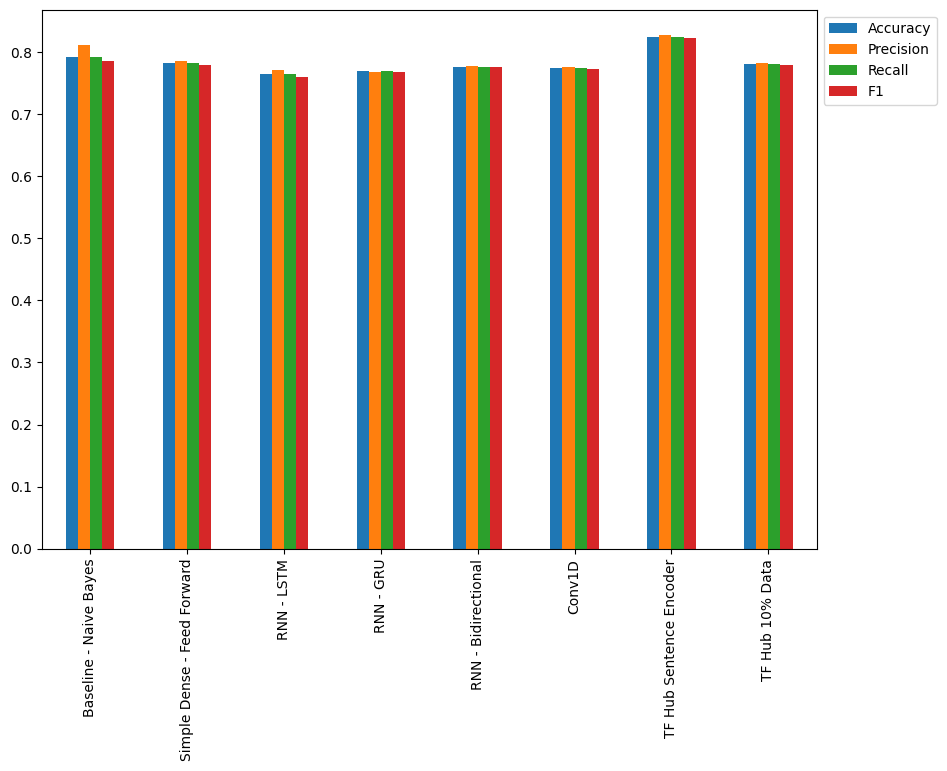

In [127]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

Looks like our pretrained USE TensorFlow Hub models have the best performance, even the one with only 10% of the training data seems to outperform the other models. This goes to show the power of transfer learning.

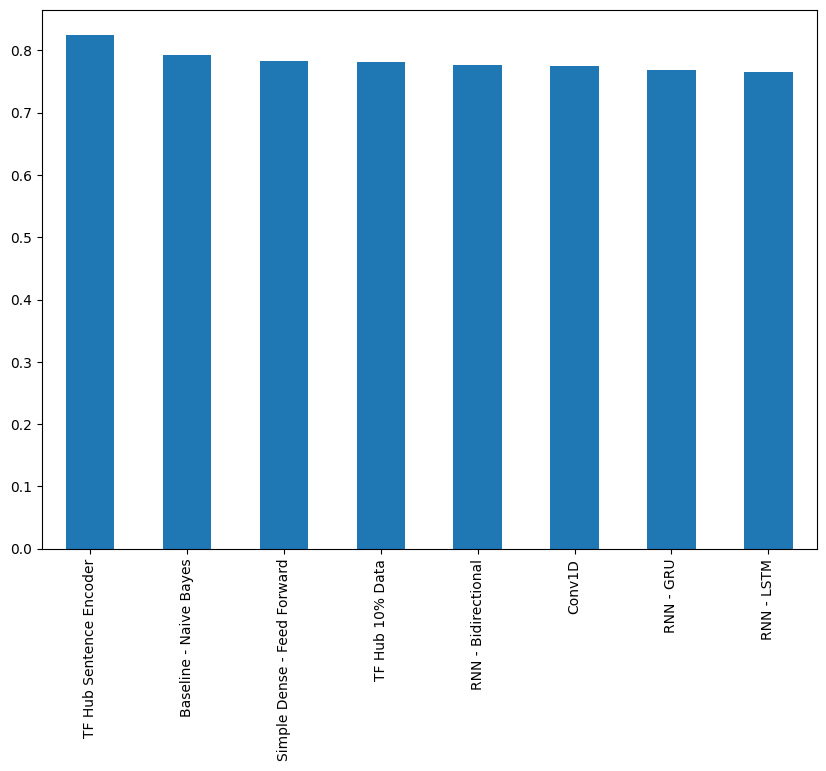

In [130]:
# Sort model results by accuracy-score
all_model_results.sort_values("Accuracy", ascending=False)["Accuracy"].plot(kind="bar", figsize=(10, 7));

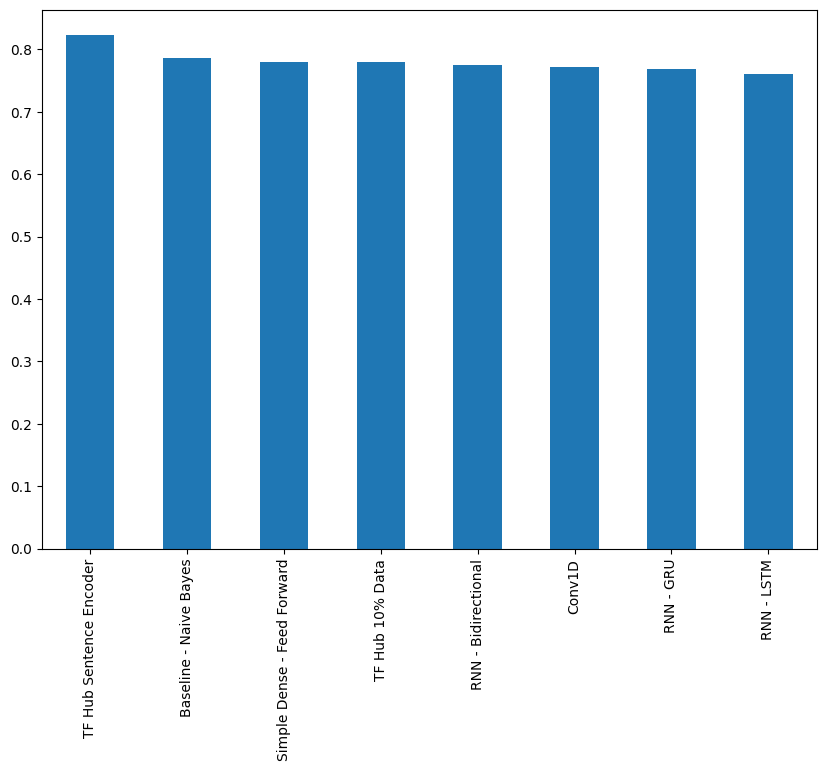

In [129]:
# Sort model results by f1-score
all_model_results.sort_values("F1", ascending=False)["F1"].plot(kind="bar", figsize=(10, 7));

## Uploading Model Training Logs to TesnorBoard.dev

We can further inspect our model's performance using TensorBoard.dev: https://tensorboard.dev/

**Resource:** TensorBoard is great for quickly tracking experiments but for larger scale experiments and a whole bunch more tracking options, check out Weights & Biases: https://wandb.ai/site

In [134]:
## View TensorBoard logs of transfer learning modelling experiments (plus all of our other models)
## Upload TensorBoard dev records
#!tensorboard dev upload --logdir ./model_logs/ \
#--name "NLP Modelling Experiments" \
#--description "Comparing multiple different types of model architectures on the Kaggle Tweets text classification dataset" \
#--one_shot # exit the uploader once uploading is finished


Tensorboard Hub link: https://tensorboard.dev/experiment/Ny3kBVyDQV2lyk9Xlz1FXw/#scalar

In [135]:
# # See the previous TensorBoard Dev experiments you've run...
# !tensorboard dev list

In [136]:
# If you need to delete an experiment from TensorBoard, you can run the following:
# !tensorboard dev delete --experiment_id Eacboed3RbKPWIGcXe1Z6gB

## Model Ensembling/Model Stacking
Many production systems use an **ensemble** (multiple different models combined) of models to make a prediction.

The idea behind model stacking is that if several uncorrelated models agree on a prediction, then the prediction must be more robust than a prediction made by a singular model.

The keyword in the sentence above is **uncorrelated**, which is another way of saying, different types of models. For example, in our case, we might combine our baseline, our bidirectional model and our TensorFlow Hub USE model.

Although these models are all trained on the same data, they all have a different way of finding patterns.

If we were to use three similarly trained models, such as three LSTM models, the predictions they output will likely be very similar.

Think of it as trying to decide where to eat with your friends. If you all have similar tastes, you'll probably all pick the same restaurant. But if you've all got different tastes and still end up picking the same restaurant, the restaurant must be good.

Since we're working with a classification problem, there are a few of ways we can combine our models:


1. **Averaging** - Take the output prediction probabilities of each model for each sample, combine them and then average them.
2. **Majority vote (mode)** - Make class predictions with each of your models on all samples, the predicted class is the one in majority. For example, if three different models predict `[1, 0, 1]` respectively, the majority class is `1`, therefore, that would be the predicted label.
3. **Model Stacking** - Take the outputs of each of your chosen models and use them as inputs to another model.

**Resource:** The above methods for model stacking/ensembling were adapted from Chapter 6 of the [Machine Learning Engineering Book by Andriy Burkov](https://leanpub.com/MLE). If you're looking to enter the field of machine learning engineering, not only building models but production-scale machine learning systems.

Again, the concept of model stacking is best seen in action.

We're going to combine our **baseline model** `(model_0)`, **LSTM model** `(model_2)` and our **USE model** trained on the **full training data**`(model_6)` by averaging the combined prediction probabilities of each.

In [137]:
# Get mean pred probs for 3 models
baseline_pred_probs = np.max(model_0.predict_proba(val_sentences), axis=1) # get the prediction probabilities from baseline model
combined_pred_probs = baseline_pred_probs + tf.squeeze(model_2_pred_probs, axis=1) + tf.squeeze(model_6_pred_probs)
combined_preds = tf.round(combined_pred_probs/3) # average and round the prediction probabilities to get prediction classes
combined_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 1.], dtype=float32)>

We've got a combined predictions array of different classes, let's evaluate them against the true labels and add our stacked model's results to our `all_model_results` DataFrame.

In [138]:
# Calculate results from averaging the prediction probabilities
ensemble_results = calculate_results(val_labels, combined_preds)
ensemble_results

{'Accuracy': 79.39632545931758,
 'Precision': 0.7955051847534342,
 'Recall': 0.7939632545931758,
 'F1': 0.7923752518839116}

In [139]:
# Add our combined model's results to the results DataFrame
all_model_results.loc["ensemble_results"] = ensemble_results

In [140]:
# Convert the accuracy to the same scale as the rest of the results
all_model_results.loc["ensemble_results"]["Accuracy"] = all_model_results.loc["ensemble_results"]["Accuracy"]/100

In [141]:
all_model_results

,Accuracy,Precision,Recall,F1
Baseline - Naive Bayes,0.792651,0.811139,0.792651,0.786219
Simple Dense - Feed Forward,0.782152,0.786040,0.782152,0.779381
RNN - LSTM,0.765092,0.771907,0.765092,0.760662
RNN - GRU,0.769029,0.768832,0.769029,0.768158
RNN - Bidirectional,0.776903,0.777399,0.776903,0.775574
Conv1D,0.774278,0.775504,0.774278,0.772479
TF Hub Sentence Encoder,0.824147,0.827163,0.824147,0.822552
TF Hub 10% Data,0.780840,0.782097,0.780840,0.779151
ensemble_results,0.793963,0.795505,0.793963,0.792375




#### How did the stacked model go against the other models?

**Note:** It seems many of our model's results are similar. This may mean there are some limitations to what can be learned from our data. When many of your modelling experiments return similar results, it's a good idea to revisit your data.



## Saving and Loading a Trained Model

Although training time didn't take very long, it's good practice to save your trained models to avoid having to retrain them.

Saving your models also enables you to export them for use elsewhere outside of your notebooks, such as in a web application.

There are two main ways of [saving a model in TensorFlow](https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model):

1. The HDF5 format.
2. The SavedModel format (default).

Let's take a look at both.

In [142]:
# Save TF Hub Sentence Encoder model to HDF5 format
model_6.save("model_6.h5")



If you save a model as a HDF5, when loading it back in, you need to let [TensorFlow know about any custom objects](https://www.tensorflow.org/tutorials/keras/save_and_load#saving_custom_objects) you've used (e.g. components which aren't built from pure TensorFlow, such as TensorFlow Hub components).


In [143]:
# Load model with custom Hub Layer (required with HDF5 format)
loaded_model_6 = tf.keras.models.load_model("model_6.h5",
                                            custom_objects={"KerasLayer": hub.KerasLayer})

In [144]:
# How does our loaded model perform?
loaded_model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 23ms/step - loss: 0.4188 - accuracy: 0.8241


[0.4187762141227722, 0.8241469860076904]

Calling the `save()` method on our target model and passing it a filepath allows us to save our model in the `SavedModel` form

In [145]:
# Save TF Hub Sentence Encoder model to SavedModel format (default)
model_6.save("model_6_SavedModel_format")

If you use SavedModel format (default), you can reload your model without specifying custom objects using the `tensorflow.keras.models.load_model()` function.

In [146]:
# Load TF Hub Sentence Encoder SavedModel
loaded_model_6_SavedModel = tf.keras.models.load_model("model_6_SavedModel_format")


In [147]:
# Evaluate loaded SavedModel format
loaded_model_6_SavedModel.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 21ms/step - loss: 0.4188 - accuracy: 0.8241


[0.4187763035297394, 0.8241469860076904]

**Question:** Should you used the `SavedModel` format or `HDF5` format?

For most use cases, the `SavedModel` format will suffice. However, this is a TensorFlow specific standard. If you need a more general-purpose data standard, `HDF5` might be better. For more, check out the [TensorFlow documentation on saving and loading models](https://www.tensorflow.org/tutorials/keras/save_and_load).

In [158]:
from google.colab import files
files.download('/content/model_6.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Finding the Most Wrong Examples (Model Driven Data Exploration/ Active Learning)

We mentioned before that if many of our modelling experiments are returning similar results, despite using different kinds of models, it's a good idea to return to the data and inspect why this might be.

One of the best ways to inspect your data is to sort your model's predictions and find the samples it got most wrong, meaning, what predictions had a high prediction probability but turned out to be wrong.

Once again, visualization is your friend. Visualize, visualize, visualize.

To make things visual, let's take our best performing model's prediction probabilities and classes along with the validation samples (text and ground truth labels) and combine them in a pandas DataFrame.

- If our best model still isn't perfect, what examples is it getting wrong?
- Which ones are the most wrong?
- Are there some labels which are wrong?

In [148]:
# Download a pretrained model from Google Storage
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
!unzip 08_model_6_USE_feature_extractor.zip

--2023-06-19 01:23:42--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.128, 142.251.12.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M  21.4MB/s    in 52s     

2023-06-19 01:24:35 (17.6 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]

Archive:  08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  
  inflating: 08_model_6_USE_feature_extractor/variables/variables.

In [149]:
# Import previously trained model from Google Storage
model_6_pretrained = tf.keras.models.load_model("08_model_6_USE_feature_extractor")
model_6_pretrained.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 11ms/step - loss: 0.4272 - accuracy: 0.8163


[0.42723122239112854, 0.8162729740142822]

In [150]:
# Make predictions with the loaded model from GS
model_6_pretrained_pred_probs = model_6_pretrained.predict(val_sentences)
model_6_pretrained_preds = tf.squeeze(tf.round(model_6_pretrained_pred_probs))
model_6_pretrained_preds[:10] # these should be in label format

24/24 [==============================] - 1s 22ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [151]:
# Create DataFrame with validation sentences, validation labels and best performing model prediction labels + probabilities
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred": model_6_pretrained_preds,
                       "pred_prob": tf.squeeze(model_6_pretrained_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.159757
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.747162
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988749
3,@camilacabello97 Internally and externally scr...,1,0.0,0.196229
4,Radiation emergency #preparedness starts with ...,1,1.0,0.707808


In [152]:
# Find the wrong predictions and sort by prediction probabilities
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)
most_wrong[:10] # these are false positives

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910196
759,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
628,@noah_anyname That's where the concentration c...,0,1.0,0.852300
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.835454
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.827213
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.814816
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.810840
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.803122
119,@freefromwolves GodsLove &amp; #thankU brother...,0,1.0,0.766901
344,Air Group is here to the rescue! We have 24/7 ...,0,1.0,0.766625


In [153]:
most_wrong.tail() # these are false negatives

,text,target,pred,pred_prob
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.043918
233,I get to smoke my shit in peace,1,0.0,0.042087
38,Why are you deluged with low self-image? Take ...,1,0.0,0.038998
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.038949
23,Ron &amp; Fez - Dave's High School Crush https...,1,0.0,0.037186


In [154]:
# Check the false positives (model predicted 1 when should've been 0)
for row in most_wrong[:10].itertuples():
  _, text, target, pred, pred_prob = row
  print(f"Target: {target}, Pred: {pred}, Prob: {pred_prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 0, Pred: 1.0, Prob: 0.9101957678794861
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----

Target: 0, Pred: 1.0, Prob: 0.8769821524620056
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

Target: 0, Pred: 1.0, Prob: 0.8523001074790955
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

----

Target: 0, Pred: 1.0, Prob: 0.8354544043540955
Text:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

----

Target: 0, Pred: 1.0, Prob: 0.8272132277488708
Text:
@AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything we should listen to the Americans.

----

Target: 0, Pred: 1.0, Prob: 0.814815878868103
Text:
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

----

In [155]:
# Check the false negatives (model predicted 0 when should've been 1)
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, pred_prob = row
  print(f"Target: {target}, Pred: {pred}, Prob: {pred_prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 1, Pred: 0.0, Prob: 0.06730346381664276
Text:
@DavidVonderhaar At least you were sincere ??

----

Target: 1, Pred: 0.0, Prob: 0.05507583171129227
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

----

Target: 1, Pred: 0.0, Prob: 0.05460337549448013
Text:
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

----

Target: 1, Pred: 0.0, Prob: 0.054597001522779465
Text:
going to redo my nails and watch behind the scenes of desolation of smaug ayyy

----

Target: 1, Pred: 0.0, Prob: 0.04963727295398712
Text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

----

Target: 1, Pred: 0.0, Prob: 0.043918490409851074
Text:
@SoonerMagic_ I mean I'm a fan but I don't need a girl sounding off like a damn siren

----

Target: 1, Pred: 0.0, Prob: 0.

## Making Predictions on the Test Dataset
We don't have labels for the test dataset so we're going to have to make some predictions and inspect them for ourselves.

Let's write some code to make predictions on random samples from the test dataset and visualize them.

In [156]:
# Making predictions on the test dataset
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6.predict([test_sample])) # has to be list
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("----\n")

1/1 [==============================] - 0s 44ms/step
Pred: 0, Prob: 0.08054593950510025
Text:
HST's Anthony Kimery Discusses #BioTerrorism on @Syfy Channel's 'Joe Rogan Questions Everything' #Pathogen #Virus http://t.co/0FDsc3f2IW

----

1/1 [==============================] - 0s 41ms/step
Pred: 0, Prob: 0.16138604283332825
Text:
That 'attitude problem' is a result of constantly being belittled bashed attacked &amp; demoralized. 
FUCK YOU @HOT97

----

1/1 [==============================] - 0s 71ms/step
Pred: 0, Prob: 0.06623225659132004
Text:
Smackdown tyme this should put me in a good mood again since it got wrecked smh

----

1/1 [==============================] - 0s 98ms/step
Pred: 0, Prob: 0.026533547788858414
Text:
Don't ruin a good today by thinking about a bad yesterday ????

----

1/1 [==============================] - 0s 84ms/step
Pred: 0, Prob: 0.06733794510364532
Text:
Would you blow me kisses
If I kept my distance?
Would you send a hurricane
As proof of your existence?

----

## Predicting on Random Tweets
How about we find some Tweets and use our model to predict whether or not they're about a diaster or not?

To start, let's take a sample Tweet.

In [163]:
# Turn Tweet into string
my_tweet = "20% of the homes destroyed in my village due to annual flood."

Now we'll write a small function to take a model and an example sentence and return a prediction.

In [164]:
def predict_on_sentence(model, sentence):
  """
  Uses model to make a prediction on sentence.

  Returns the sentence, the predicted label and the prediction probability.
  """
  pred_prob = model.predict([sentence])
  pred_label = tf.squeeze(tf.round(pred_prob)).numpy()
  print(f"Pred: {pred_label}", "(real disaster)" if pred_label > 0 else "(not real disaster)", f"Prob: {pred_prob[0][0]}")
  print(f"Text:\n{sentence}")

In [165]:
# Make a prediction on Tweet from the wild
predict_on_sentence(model=model_6, # use the USE model
                    sentence=my_tweet)

1/1 [==============================] - 0s 40ms/step
Pred: 1.0 (real disaster) Prob: 0.911687970161438
Text:
20% of the homes destroyed in my village due to annual flood.


Our model predicted correctly. My Tweet wasn't about a diaster.

How about we find a few Tweets about actual diasters?

Such as the following two Tweets about the 2020 Beirut explosions.

In [166]:
# Source - https://twitter.com/BeirutCityGuide/status/1290696551376007168
beirut_tweet_1 = "Reports that the smoke in Beirut sky contains nitric acid, which is toxic. Please share and refrain from stepping outside unless urgent. #Lebanon"

# Source - https://twitter.com/BeirutCityGuide/status/1290773498743476224
beirut_tweet_2 = "#Beirut declared a “devastated city”, two-week state of emergency officially declared. #Lebanon"

In [167]:
# Predict on diaster Tweet 1
predict_on_sentence(model=model_6,
                    sentence=beirut_tweet_1)

1/1 [==============================] - 0s 58ms/step
Pred: 1.0 (real disaster) Prob: 0.9871976971626282
Text:
Reports that the smoke in Beirut sky contains nitric acid, which is toxic. Please share and refrain from stepping outside unless urgent. #Lebanon


In [168]:
# Predict on diaster Tweet 2
predict_on_sentence(model=model_6,
                    sentence=beirut_tweet_2)

1/1 [==============================] - 0s 63ms/step
Pred: 1.0 (real disaster) Prob: 0.9921616911888123
Text:
#Beirut declared a “devastated city”, two-week state of emergency officially declared. #Lebanon


## Trade-off Between Model Speed and Score
One of the final tests we're going to do is to find the speed/score tradeoffs between our best model and baseline model.

**Why is this important?**

Although it can be tempting to just choose the best performing model you find through experimentation, this model might not actually work in a production setting.

Put it this way, imagine you're Twitter and receive 1 million Tweets per hour (this is a made up number, the actual number is much higher). And you're trying to build a diaster detection system to read Tweets and alert authorities with details about a diaster in close to real-time.

Compute power isn't free so you're limited to a single compute machine for the project. On that machine, one of your models makes 10,000 predictions per second at 80% accuracy where as another one of your models (a larger model) makes 100 predictions per second at 85% accuracy.

**Which model do you choose?**

Is the second model's performance boost worth missing out on the extra capacity?

Of course, there are many options you could try here, such as sending as many Tweets as possible to the first model and then sending the ones which the model is least certain of to the second model.

> The point here is to illustrate the best model you find through experimentation, might not be the model you end up using in production.

To make this more concrete, let's write a function to take a model and a number of samples and time how long the given model takes to make predictions on those samples.

In [169]:
# Calculate the time of predictions
import time
def pred_timer(model, samples):
  """
  Times how long a model takes to make predictions on samples.

  Args:
  ----
  model = a trained model
  sample = a list of samples

  Returns:
  ----
  total_time = total elapsed time for model to make predictions on samples
  time_per_pred = time in seconds per single sample
  """
  start_time = time.perf_counter() # get start time
  model.predict(samples) # make predictions
  end_time = time.perf_counter() # get finish time
  total_time = end_time-start_time # calculate how long predictions took to make
  time_per_pred = total_time/len(val_sentences) # find prediction time per sample
  return total_time, time_per_pred

Now let's use our `pred_timer()` function to evaluate the prediction times of our best performing model `(model_6)` and our baseline model `(model_0)`.

In [170]:
# Calculate TF Hub Sentence Encoder prediction times
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model_6, val_sentences)
model_6_total_pred_time, model_6_time_per_pred

24/24 [==============================] - 1s 20ms/step


(0.7025974280004448, 0.0009220438687669879)

In [171]:
# Calculate Naive Bayes prediction times
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0, val_sentences)
baseline_total_pred_time, baseline_time_per_pred

(0.0242088609993516, 3.1770158791800004e-05)

Is that extra prediction time worth it?

Let's compare time per prediction versus our model's F1-scores.

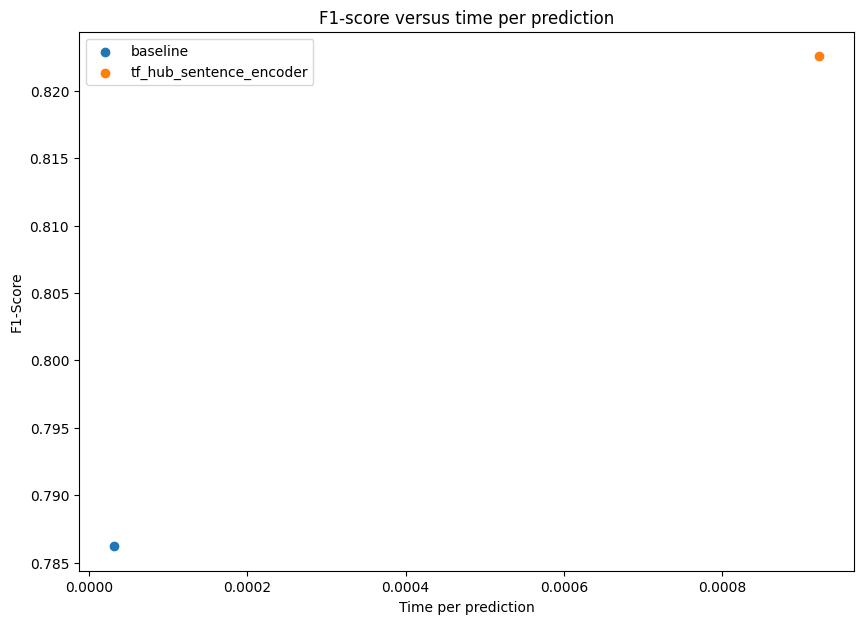

In [173]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(baseline_time_per_pred, baseline_results["F1"], label="baseline")
plt.scatter(model_6_time_per_pred, model_6_results["F1"], label="tf_hub_sentence_encoder")
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1-Score");

The ideal position for each of these dots is to be in the top left of the plot (low time per prediction, high F1-score).

In this case, there's a clear tradeoff for time per prediction and performance. Our best performing model takes an order of magnitude longer per prediction but only results in a few F1-score point increase.

This kind of tradeoff is something needs to be kept in mind when incorporating machine learning models into own applications.